In [2]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import sys
import time
import tqdm
import sklearn
from sklearn import datasets
from sklearn import svm
from time import time

In [3]:
min_max_scaler = sklearn.preprocessing.MinMaxScaler()

# Linear Regression


*   Dataset: house price from boston
*   Objective: implement both numerical + analytical solutions
*   PLot and check for convergence
*   Compare with Linear Regression using sklearn


1.   Analytical solution: $\beta = (X^TX)^{-1}X^T y$
2.   Numerical solution:

      *   Loss function (MSE): $\mathcal{L} (y, \hat{y}) = \frac{1}{N}\sum_{i=1}^N (y-\hat{y})^2$
      *   Update rule: $\beta_{t+1} = \beta_t - \gamma \nabla \mathcal{L} (\beta_t)$
      *   Momentum: $\Delta \beta_{t+1} = -\gamma \nabla \mathcal{L}(\beta_{t+1}) + \alpha\Delta \beta_{t}$
      *   Update rule for momentum:  $\beta_{t+1} = \beta_t + \Delta \beta_{t}$


*  Visualize loss convergent
*  Plot linear regression line 
*  Comparison:
    -  Time 
    -  MSE
    -  Matching parameter vectors $\beta$









In [4]:
# LOAD DATA
X, y = datasets.load_boston(return_X_y=True)
X_ = X
X = min_max_scaler.fit_transform(X)
X = np.insert(X, 0, 1, 1)
X_ = np.insert(X_, 0, 1, 1)

In [5]:
# IMPLEMENT NUMERICAL SOLUTION HERE
def LR_beta(X,y):
    return np.matmul(np.linalg.inv(X.T.dot(X)), X.T.dot(y))
def cost_function(X, y, beta):                 
    norm = np.linalg.norm(X.dot(beta)-y)
    return norm*norm/len(X)

%time beta_num = LR_beta(X_,y)
intercept = beta_num[0]
coef = beta_num[1:]
print('Intercept:', intercept, '\nCoefficents:', coef)
cost_num = cost_function(X_,y,beta_num)
print("MSE:",cost_num)

CPU times: user 946 µs, sys: 660 µs, total: 1.61 ms
Wall time: 399 µs
Intercept: 36.45948838507229 
Coefficents: [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
MSE: 21.8948311817292


In [6]:
# IMPLEMENT GRADIENT DESCENT HERE
# REQUIREMENTS: a function to calculate the gradient , a function to calculate the loss function, a function to excecute gradient descent
class LinearRegression:
    
    
    def cost_function(self, X, y, beta):                 
        norm = np.linalg.norm(X.dot(beta)-y)
        return norm*norm/len(X)
    def gradient(self, X, y, beta):
        return 2/len(X)*X.T.dot(X.dot(beta)-y)
    def fit(self, X, y, tau = 0.01, gamma =0.05):        
        loss = []
        beta = np.random.randn(X.shape[1])
        N = len(X)
        cost_dif = 10*tau
        old_cost = self.cost_function(X,y,beta)
        

        while cost_dif >= tau:        
            # Gradient Descent
            beta -= np.array([gamma*i for i in self.gradient(X,y,beta)])
            # Saving Progress
            new_cost = self.cost_function(X,y,beta)
            cost_dif = abs(new_cost - old_cost)
            loss.append(cost_dif)
            old_cost = new_cost
        self.beta = beta
        self.intercept = self.beta[0]
        self.coef_ = self.beta[1:]
        self.loss = loss
        self.iterations = len(loss)
    
    def predict(self, X):        
        return X.dot(self.beta)

    def fit_momentum(self, X, y, tau = 0.01, gamma =0.05, alpha = 0.05):        
        loss = []
        beta = np.random.rand(X.shape[1])
        N = len(X)
        dtheta = np.zeros(beta.shape)
        cost_dif = 10*tau
        old_cost = self.cost_function(X,y,beta)
        

        while cost_dif >= tau:        
            # Gradient Descent with momentum
            dtheta = np.array([alpha*i for i in dtheta]) - np.array([gamma*i for i in self.gradient(X,y,beta)])
            beta += dtheta
            # Saving Progress
            new_cost = self.cost_function(X,y,beta)
            cost_dif = abs(new_cost - old_cost)
            loss.append(cost_dif)
            old_cost = new_cost
        self.beta = beta
        self.intercept = self.beta[0]
        self.coef_ = self.beta[1:]
        self.loss = loss
        self.iterations = len(loss)
    


In [7]:
# Run without momentum
LR = LinearRegression()
%time LR.fit(X, y, gamma=5e-2, tau=1e-7)


CPU times: user 402 ms, sys: 4.92 ms, total: 407 ms
Wall time: 407 ms


Number of iterations: 12332 
Beta: [ 26.50676154  -9.55005577   4.62691968   0.571595     2.68776494
  -8.60044787  19.97056561   0.06642495 -16.15981725   7.01721251
  -6.45293859  -8.94057224   3.71331556 -18.98070615] 
MSE: 21.89495868478958


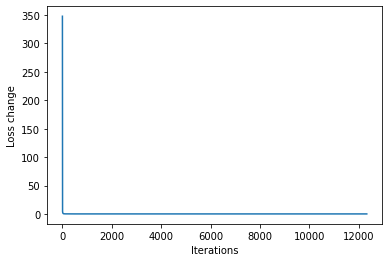

In [8]:
# VISUALIZATION
print('Number of iterations:', LR.iterations, '\nBeta:', LR.beta, '\nMSE:', LR.cost_function(X,y,LR.beta))
plt.plot(LR.loss)
plt.ylabel('Loss change')
plt.xlabel('Iterations')
plt.show()

In [9]:
# Run with momentum
LR_mmt = LinearRegression()
%time LR_mmt.fit_momentum(X,y, tau=1e-12, gamma=1e-1, alpha=0.9)

CPU times: user 56.5 ms, sys: 2.3 ms, total: 58.8 ms
Wall time: 57.5 ms


Number of iterations: 1443 
Beta: [ 26.62018929  -9.60972388   4.64203601   0.560847     2.68673437
  -8.6345502   19.88374712   0.0672142  -16.22661621   7.03912456
  -6.46332103  -8.9558135    3.69284131 -19.01721676] 
MSE: 21.894831181787385


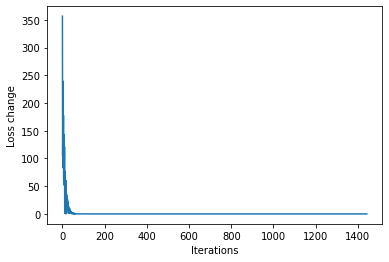

In [10]:
# VISUALIZATION
print('Number of iterations:', LR_mmt.iterations, '\nBeta:', LR_mmt.beta, '\nMSE:', LR_mmt.cost_function(X,y,LR_mmt.beta))
plt.plot(LR_mmt.loss)
plt.ylabel('Loss change')
plt.xlabel('Iterations')
plt.show()

In [11]:
# SOLUTION FROM SKLEARN
%time LR_sklearn = sklearn.linear_model.LinearRegression().fit(X_,y)
y_predict = np.array(LR_sklearn.predict(X_))
norm = np.linalg.norm(y_predict-y)
MSE = norm*norm/len(X_)
beta_sklearn = LR_sklearn.coef_
print('Coefficents:', beta_sklearn, '\nIntercept:', LR.intercept)
print('MSE:', MSE)


CPU times: user 1.59 ms, sys: 1.25 ms, total: 2.84 ms
Wall time: 1.84 ms
Coefficents: [ 0.00000000e+00 -1.08011358e-01  4.64204584e-02  2.05586264e-02
  2.68673382e+00 -1.77666112e+01  3.80986521e+00  6.92224640e-04
 -1.47556685e+00  3.06049479e-01 -1.23345939e-02 -9.52747232e-01
  9.31168327e-03 -5.24758378e-01] 
Intercept: 26.50676154466725
MSE: 21.894831181729202


# Logistic Regression

*   Dataset: breast cancer dataset
*   Objective: implement both numerical solution
*   PLot and check for convergence
*   Compare with Linear Regression using sklearn


#   Numerical solution:

*   Loss function (Maximum Likelihood Estimator): $\mathcal{L} (y,\hat{y}) = -\frac{1}{N}\sum_{i=1}^N \left[y_i\cdot\log(\hat{y}_i)+(1-y_i)\log(1-\hat{y}_i)\right]$

*   Logistic function : $\sigma(t) = \frac{1}{1+e^{-t}}$
      

In [12]:
X,y = datasets.load_breast_cancer(return_X_y = True)
X_ = X
X = min_max_scaler.fit_transform(X)
X = np.insert(X, 0, 1, 1)

In [13]:
class LogisticRegression:
    
    def logistic_function(self, t):
        return 1/(1+np.exp(-t))
    
    def cost_function(self, X, y, beta):                 
        y_hat = self.logistic_function(X.dot(beta))
        cost = np.mean([y*np.log(y_hat) + (1 - y)*np.log(1 - y_hat)])
        return cost

    def grad_function(self, X, y, beta):
        t = X.dot(beta)
        y_hat = self.logistic_function(t)
        y_dif = y_hat - y
        return y_dif.dot(X)/len(y)
    
    def fit(self, X, y, tau=0.1, lr=0.05, alpha=0.05):        
        loss = []
        beta = np.random.rand(X.shape[1])
        N = len(X)
        dtheta = np.zeros(beta.shape)
        cost_dif = 10*tau
        old_cost = self.cost_function(X,y,beta)
        

        while cost_dif >= tau:        
            # Gradient Descent with momentum
            dtheta = np.array([alpha*i for i in dtheta]) - lr*self.grad_function(X,y,beta)
            beta += dtheta
            # Saving Progress
            new_cost = self.cost_function(X,y,beta)
            cost_dif = abs(new_cost - old_cost)
            loss.append(cost_dif)
            old_cost = new_cost
        self.beta = beta
        self.intercept = self.beta[0]
        self.coef_ = self.beta[1:]
        self.loss = loss
        self.iterations = len(loss)
    def predict(self, X):        
        t = X.dot(self.beta)
        y_hat = self.logistic_function(t)
        y_pred = [1 if i > 0.5 else 0 for i in y_hat]
        return y_pred


In [14]:
lgr = LogisticRegression()
%time lgr.fit(X,y, tau=1e-6, lr=1e-1, alpha=0.8)

CPU times: user 9.94 s, sys: 6.52 s, total: 16.5 s
Wall time: 2.28 s


In [15]:
print(sklearn.metrics.classification_report(y, lgr.predict(X)))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       212
           1       0.98      0.99      0.99       357

    accuracy                           0.98       569
   macro avg       0.98      0.98      0.98       569
weighted avg       0.98      0.98      0.98       569



In [16]:
# SKLEARN
clf = sklearn.linear_model.LogisticRegression()
%time clf.fit(X,y)
print(sklearn.metrics.classification_report(y, clf.predict(X)))

CPU times: user 39 ms, sys: 38.1 ms, total: 77 ms
Wall time: 13.7 ms
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       212
           1       0.96      1.00      0.98       357

    accuracy                           0.97       569
   macro avg       0.98      0.96      0.97       569
weighted avg       0.97      0.97      0.97       569



# Support Vector Machine


*   Dataset: breast cancer
*   Objective: understand how SVM work/ the effects of choosing kernels on dataset



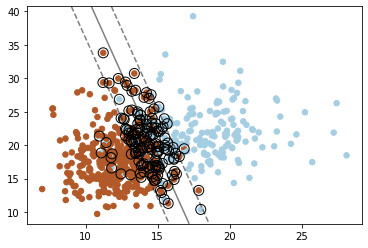

In [130]:
X, y = datasets.load_breast_cancer(return_X_y = True)
X = X[:,:2]

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

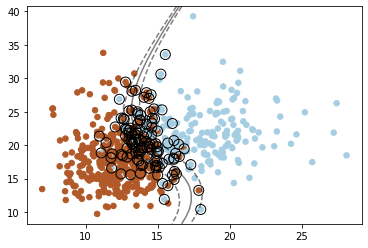

In [131]:
X, y = datasets.load_breast_cancer(return_X_y = True)
X = X[:,:2]

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='poly', C=1000)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

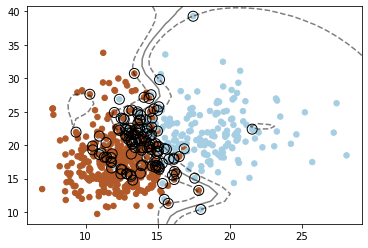

In [132]:
X, y = datasets.load_breast_cancer(return_X_y = True)
X = X[:,:2]

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='rbf', C=1000)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()